This is an exercise of how much learning I can do in a week; How to use Jupyter Notebook, what the benefits of using Jupyter Notebook are, and exploration of a dataset of financial data, as I want to see if there are additional insights for me to reveal, looking at this same dataset after 3 years.

The data was taken from the World Bank. Full report and overview is available here: https://globalfindex.worldbank.org/ 

In [885]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv (r'C:\Users\nicol\Documents\financial_inclusion\Global Findex Database.csv')
df.columns

Index(['Year', 'Unnamed: 1', 'Country', 'Unnamed: 3', 'Unnamed: 4',
       'Account (% age 15+)', 'Account, male (% age 15+)',
       'Account, in labor force (% age 15+) ',
       'Account, out of labor force (% age 15+) ',
       'Account, female (% age 15+)',
       ...
       'Mobile money account, in labor force (% age 15+) ',
       'Mobile money account, out of labor force (% age 15+) ',
       'Mobile money account, female (% age 15+) ',
       'Mobile money account, young adults  (% age 15-24) ',
       'Mobile money account, older adults (% age 25+) ',
       'Mobile money account, primary education or less (% age 15+) ',
       'Mobile money account, secondary education or less (% age 15+) ',
       'Mobile money account, income, poorest 40% (% age 15+) ',
       'Mobile money account, income, richest 60%  (% age 15+) ',
       'Mobile money account, rural  (% age 15+) '],
      dtype='object', length=781)

I renamed some of the automatically named columns.

In [886]:
df = df.rename(columns={"Unnamed: 1": "Abbreviation", "Unnamed: 3": "Region", "Unnamed: 4": "Income Category"})
df.reset_index(drop=True, inplace=True)
df.rename_axis("Id")
df.head()

,Year,Abbreviation,Country,Region,Income Category,Account (% age 15+),"Account, male (% age 15+)","Account, in labor force (% age 15+)","Account, out of labor force (% age 15+)","Account, female (% age 15+)",...,"Mobile money account, in labor force (% age 15+)","Mobile money account, out of labor force (% age 15+)","Mobile money account, female (% age 15+)","Mobile money account, young adults (% age 15-24)","Mobile money account, older adults (% age 25+)","Mobile money account, primary education or less (% age 15+)","Mobile money account, secondary education or less (% age 15+)","Mobile money account, income, poorest 40% (% age 15+)","Mobile money account, income, richest 60% (% age 15+)","Mobile money account, rural (% age 15+)"
0,2011,AFG,Afghanistan,South Asia,Low income,9%,15%,15%,2%,3%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,AFG,Afghanistan,South Asia,Low income,10%,16%,15%,4%,4%,...,1%,0%,0%,0%,0%,0%,0%,0%,1%,0%
2,2017,AFG,Afghanistan,South Asia,Low income,15%,23%,25%,4%,7%,...,2%,0%,1%,0%,1%,0%,2%,0%,1%,1%
3,2011,AGO,Angola,Sub-Saharan Africa (excluding high income),Lower middle income,39%,39%,46%,31%,39%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,AGO,Angola,Sub-Saharan Africa (excluding high income),Lower middle income,29%,36%,36%,12%,22%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I have decided that it would be better to delete the columns where there is no data for any country, such as the "Saved for education or school fees (% age 15+)" and its derived metrics, "Main mode of withdrawal" metrics, "Borrowed for education or school fees" and its derived metrics, and "Borrowed from a store by buying on credit" and its derived metrics.

In [887]:
df = df.dropna(axis = 1, how='all')
df.columns

Index(['Year', 'Abbreviation', 'Country', 'Region', 'Income Category',
       'Account (% age 15+)', 'Account, male (% age 15+)',
       'Account, in labor force (% age 15+) ',
       'Account, out of labor force (% age 15+) ',
       'Account, female (% age 15+)',
       ...
       'Mobile money account, in labor force (% age 15+) ',
       'Mobile money account, out of labor force (% age 15+) ',
       'Mobile money account, female (% age 15+) ',
       'Mobile money account, young adults  (% age 15-24) ',
       'Mobile money account, older adults (% age 25+) ',
       'Mobile money account, primary education or less (% age 15+) ',
       'Mobile money account, secondary education or less (% age 15+) ',
       'Mobile money account, income, poorest 40% (% age 15+) ',
       'Mobile money account, income, richest 60%  (% age 15+) ',
       'Mobile money account, rural  (% age 15+) '],
      dtype='object', length=781)

As for the columns where we are missing data for only some countries, at first I thought that was best to initially observe their behaviour when converted to 0's, and depending on the circumstances, later decide to drop the column or not. After looking at the data more closely, we are missing data for some columns, specifically for the years 2011 and 2014 where the specific data was likely unavailable yet. Seeing this, I can either delete these columns or only work with 2017 data. I have decided that for now I will try not to do any machine learning with such fields with high amounts of missing data. (As I might need more data to make a prediction with a model).

In [888]:
df.dtypes
df = df.fillna('0%')

I want to change the type of all these metrics from a percentage to a numeric value.

In [889]:
for x in df.columns[5:]:    
    df[x] = df[x].str.strip('%').astype(int)


I saved the formatted data in a new csv file, here is what it looks like:

In [890]:
df.to_csv('Global Financial Index Formatted.csv')
df.head()

,Year,Abbreviation,Country,Region,Income Category,Account (% age 15+),"Account, male (% age 15+)","Account, in labor force (% age 15+)","Account, out of labor force (% age 15+)","Account, female (% age 15+)",...,"Mobile money account, in labor force (% age 15+)","Mobile money account, out of labor force (% age 15+)","Mobile money account, female (% age 15+)","Mobile money account, young adults (% age 15-24)","Mobile money account, older adults (% age 25+)","Mobile money account, primary education or less (% age 15+)","Mobile money account, secondary education or less (% age 15+)","Mobile money account, income, poorest 40% (% age 15+)","Mobile money account, income, richest 60% (% age 15+)","Mobile money account, rural (% age 15+)"
0,2011,AFG,Afghanistan,South Asia,Low income,9,15,15,2,3,...,0,0,0,0,0,0,0,0,0,0
1,2014,AFG,Afghanistan,South Asia,Low income,10,16,15,4,4,...,1,0,0,0,0,0,0,0,1,0
2,2017,AFG,Afghanistan,South Asia,Low income,15,23,25,4,7,...,2,0,1,0,1,0,2,0,1,1
3,2011,AGO,Angola,Sub-Saharan Africa (excluding high income),Lower middle income,39,39,46,31,39,...,0,0,0,0,0,0,0,0,0,0
4,2014,AGO,Angola,Sub-Saharan Africa (excluding high income),Lower middle income,29,36,36,12,22,...,0,0,0,0,0,0,0,0,0,0


We can take a look at some snapshots of the data to give us some ideas. For now I will look at a subset of countries: Canada, South Korea and the United Arab Emirates.

In [891]:
sample = df.loc[df['Country'].isin(['Canada', 'Korea, Rep.', 'United Arab Emirates'])]
sample.head()

,Year,Abbreviation,Country,Region,Income Category,Account (% age 15+),"Account, male (% age 15+)","Account, in labor force (% age 15+)","Account, out of labor force (% age 15+)","Account, female (% age 15+)",...,"Mobile money account, in labor force (% age 15+)","Mobile money account, out of labor force (% age 15+)","Mobile money account, female (% age 15+)","Mobile money account, young adults (% age 15-24)","Mobile money account, older adults (% age 25+)","Mobile money account, primary education or less (% age 15+)","Mobile money account, secondary education or less (% age 15+)","Mobile money account, income, poorest 40% (% age 15+)","Mobile money account, income, richest 60% (% age 15+)","Mobile money account, rural (% age 15+)"
11,2011,ARE,United Arab Emirates,High income,High income,60,69,80,24,47,...,0,0,0,0,0,0,0,0,0,0
12,2014,ARE,United Arab Emirates,High income,High income,84,90,91,49,68,...,13,6,10,10,12,7,12,7,15,16
13,2017,ARE,United Arab Emirates,High income,High income,88,93,93,57,76,...,23,9,18,10,22,9,22,16,25,14
68,2011,CAN,Canada,High income,High income,96,94,96,94,97,...,0,0,0,0,0,0,0,0,0,0
69,2014,CAN,Canada,High income,High income,99,99,99,100,99,...,0,0,0,0,0,0,0,0,0,0


In [892]:
tmp = sample[["Year", "Country", "Account (% age 15+)", "Account, female (% age 15+)", "Credit card ownership (% age 15+) ", "Credit card ownership, female  (% age 15+) ", 
    "Saved at a financial institution (% age 15+) ", "Debit card ownership (% age 15+) "]]
tmp.head()

,Year,Country,Account (% age 15+),"Account, female (% age 15+)",Credit card ownership (% age 15+),"Credit card ownership, female (% age 15+)",Saved at a financial institution (% age 15+),Debit card ownership (% age 15+)
11,2011,United Arab Emirates,60,47,30,19,19,55
12,2014,United Arab Emirates,84,68,37,25,32,77
13,2017,United Arab Emirates,88,76,45,37,29,83
68,2011,Canada,96,97,72,75,53,88
69,2014,Canada,99,99,77,76,63,93


In [893]:
canada = tmp.loc[tmp['Country'] == 'Canada']
s_korea = tmp.loc[tmp['Country'] == 'Korea, Rep.']
uae = tmp.loc[tmp['Country'] == 'United Arab Emirates']

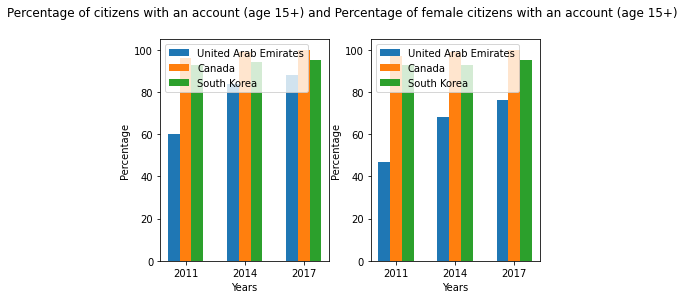

<Figure size 432x288 with 0 Axes>

In [894]:
X = ['2011', '2014', '2017']
X_axis = np.arange(len(X))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Percentage of citizens with an account (age 15+) and Percentage of female citizens with an account (age 15+)')
fig.tight_layout()

ax1.bar(X_axis - 0.2, uae['Account (% age 15+)'], 0.2, label = 'United Arab Emirates')
ax1.bar(X_axis, canada['Account (% age 15+)'], 0.2, label = 'Canada')
ax1.bar(X_axis + 0.2, s_korea['Account (% age 15+)'], 0.2, label = 'South Korea')
ax1.set_xticks(X_axis, X)
ax1.set_xlabel("Years")
ax1.set_ylabel("Percentage")
ax1.legend()

ax2.bar(X_axis - 0.2, uae['Account, female (% age 15+)'], 0.2, label = 'United Arab Emirates')
ax2.bar(X_axis, canada['Account, female (% age 15+)'], 0.2, label = 'Canada')
ax2.bar(X_axis + 0.2, s_korea['Account, female (% age 15+)'], 0.2, label = 'South Korea')
ax2.set_xticks(X_axis, X)
ax2.set_xlabel("Years")
ax2.set_ylabel("Percentage")
ax2.legend()
plt.show()
plt.savefig("image.png")

We are able to visibly see the gender gap in account holders in the United Arab Emirates, and how the amount of female account holders has been increasing over the years.

Let's also take a look at the relationship between credit card ownership and debit card ownership. As I expect the relationship to be positively correlated, hopefully this will make it easier for me to understand the basics of regression.

<AxesSubplot:xlabel='Credit card ownership (% age 15+) ', ylabel='Debit card ownership (% age 15+) '>

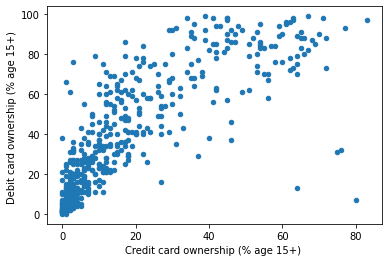

In [895]:
df.plot.scatter("Credit card ownership (% age 15+) ", "Debit card ownership (% age 15+) ")

We can see that there is generally a positive linear trend with debit card ownership and credit card ownership, which is to be expected. However, I would like to see the 4 outlier points in the lower right corner of the graph.

In [896]:
df.loc[df['Credit card ownership (% age 15+) '] > 60, ['Year', 'Country', 'Debit card ownership (% age 15+) ', 'Credit card ownership (% age 15+) ']]

,Year,Country,Debit card ownership (% age 15+),Credit card ownership (% age 15+)
20,2011,Australia,79,64
68,2011,Canada,88,72
69,2014,Canada,93,77
70,2017,Canada,97,83
72,2017,Switzerland,88,65
145,2011,Finland,89,64
146,2014,Finland,97,63
147,2017,Finland,98,63
155,2014,United Kingdom,96,62
156,2017,United Kingdom,91,65


We see that our outliers are Israel in all years, and Japan in 2011. Upon research, "What may be referred to as a credit card, is most likely to be a deferred debit card on an associated bank current account, the most common type of card in Israel, somewhat like the situation in France, though the term "debit card" is not in common usage. Cards are nearly universally called cartis ashrai (כרטיס אשראי), literally, "credit card", a term which may bely the card's characteristics. Its main feature may be a direct link to a connected bank account (through which they are mostly issued), with the total value of the transactions made on the card being debited from the bank account in full on a regular date once a month, without the option to carry the balance over; indeed certain types of transactions (such as online and/or foreign currency) may be debited directly from the connected bank account at the time of the transaction. Any such limited credit enjoyed is a result of the customer's assets and credibility with the bank, and not granted by the credit card company." (https://archive.ph/20131113174410/http://lawadv.com/credit-cards-and-lines-of-credit/)

I am willing to remove Israel from my dataset for the purposes of my model.

In [897]:
df = df[df['Country'] != 'Israel']

I will use simple linear regression in this instance.

In [898]:
x = np.array(df['Credit card ownership (% age 15+) ']).reshape((-1, 1))
y = np.array(df['Debit card ownership (% age 15+) '])

In [899]:
model = LinearRegression()

Fitting the model:

In [900]:
model.fit(x, y)

LinearRegression()

Results of the model: Coefficient of determination, the intercept, and slope

In [901]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.7015340715794098
intercept: 16.032297301795513
slope: [1.28074809]


Our predicted y for our current x values:

In [902]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 17.31304539  17.31304539  17.31304539  35.24351861  21.15528965
  30.12052626  23.71678583  26.278282    23.71678583  22.43603774
  22.43603774  54.45473993  63.41997654  73.66596124  44.20875523
  50.61249566  46.7702514   18.59379348  22.43603774  26.278282
  98.0001749   91.59643446  92.87718255  65.98147271  67.2622208
  76.22745741  19.87454156  27.55903009  22.43603774  17.31304539
  16.0322973   85.19269402  71.10446506  77.5082055   16.0322973
  17.31304539  23.71678583  17.31304539  19.87454156  22.43603774
  17.31304539  16.0322973   16.0322973   28.83977818  31.40127435
  33.96277053  40.36651096  51.89324375  54.45473993  31.40127435
  28.83977818  28.83977818  26.278282    32.68202244  40.36651096
  30.12052626  21.15528965  23.71678583  24.99753391  53.17399184
  57.0162361   50.61249566  16.0322973   30.12052626  28.83977818
  24.99753391  17.31304539  19.87454156 108.2461596  114.64990004
 122.33438856  85.19269402  99.28092299  45.48950331  51.893

As expected, this gives us a simple line.

Text(0, 0.5, 'Debit card ownership (% age 15+) ')

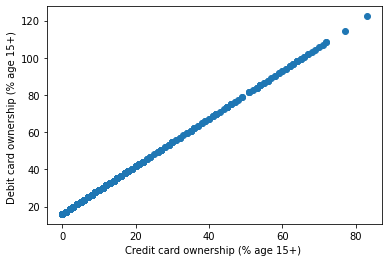

In [903]:
plt.scatter(x, y_pred)
plt.xlabel('Credit card ownership (% age 15+) ')
plt.ylabel('Debit card ownership (% age 15+) ')

We can also try a polynomial fit.

Text(0, 0.5, 'Debit card ownership (% age 15+) ')

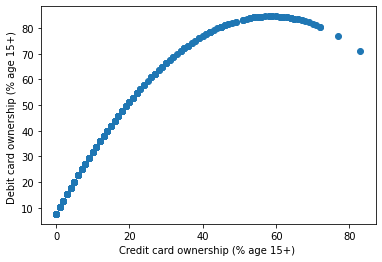

In [904]:
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_poly = transformer.transform(x)
model = LinearRegression().fit(x_poly, y)
y_pred = model.predict(x_poly)
plt.scatter(x, y_pred)
plt.xlabel('Credit card ownership (% age 15+) ')
plt.ylabel('Debit card ownership (% age 15+) ')

This does end up looking more like our original scatterplot.

Thank you for reading this far on my journey to learn machine learning! Although very simple, this is the first step towards generating more useful insights through the power of data!